# Define Test Contexts 

# Hidden on Variation
## Define Test Contexts

In [24]:
from itertools import product
from carl.envs.dmc.carl_dm_walker import DEFAULT_CONTEXT
from experiments.common.utils.json_utils import lazy_json_dump
from pathlib import Path
from rich import print as printr

context_path = "data/hidden_on_variations_walker/test_contexts.json"

magnitudes = [0.5, 0.75, 0.9, 1., 1.1, 1.25, 1.5]
mask = ["timestep"]
for m in mask:
    if m in DEFAULT_CONTEXT:
        del DEFAULT_CONTEXT[m]

context_features = list(DEFAULT_CONTEXT.keys())

context_set = {}

for cf, mag in product(context_features, magnitudes):
    key = f"{cf}_{mag}"
    default = DEFAULT_CONTEXT[cf]
    if default == 0:
        value = mag + default
    else:
        value = mag * default
    context_set[key] = {cf: value}
    for k, v in DEFAULT_CONTEXT.items():
        if k != cf:
            context_set[key][k] = v

printr(f"Created context set with {len(context_set)} contexts.")
# printr(context_set)

lazy_json_dump(context_set, context_path)

full_path = Path(context_path).resolve()


/home/benjamin/.conda/envs/carl/lib/python3.10/site-packages/glfw/__init__.py:906: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


Created context set with 91 contexts.

# Find Agents

In [27]:
from pathlib import Path
from rich import print as printr
from omegaconf import OmegaConf, ListConfig
from experiments.evaluation.loading import fn_config

# Train dir
result_dir = "/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train"

# Find agents
filters = {
    "wandb.group": "hidden",
    "context_sampler.context_feature_names": [],
}
paths = list(Path(result_dir).glob(f"**/{fn_config}"))
valid_paths = []
for p in paths:
    cfg = OmegaConf.load(p)
    is_valid = True
    for key, value in filters.items():
        item = OmegaConf.select(cfg, key)
        if item != value:
            is_valid = False
            continue
    if is_valid:
        valid_paths.append(str(p)[:-len(fn_config)])
valid_paths.sort()
printr("N valid agents: ", len(valid_paths))
printr(valid_paths[0])

valid_paths_str = ",".join(valid_paths)

command = f"python experiments/evaluation/run_evaluation.py +experiments=hidden_on_variations 'contexts_path={full_path}' 'results_path={valid_paths_str}' -m"
print(command)





N valid agents:  30

/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train/
12/

python experiments/evaluation/run_evaluation.py +experiments=hidden_on_variations 'contexts_path=/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/experiments/evaluation/data/hidden_on_variations_walker/test_contexts.json' 'results_path=/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train/12/,/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train/14/,/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train/13/,/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train/44/,/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train/43/,/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train/42/,/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train/72/,/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_

In [4]:
# Old Version
command = f"python experiments/evaluation/run_evaluation.py +experiments=hidden_on_variations 'contexts_path={full_path}' -m --result_dir {result_dir}"
print(command)

python experiments/evaluation/run_evaluation.py +experiments=hidden_on_variations 'contexts_path=/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/experiments/evaluation/data/hidden_on_variations_walker/test_contexts.json' -m --result_dir /home/benjamin/Dokumente/code/tmp/tntcomp/CARL/exp_sweep/2022-12-14/10-47-33_benchmark_train


In [16]:
import pandas as pd
import experiments.evaluation.loading
from importlib import reload
reload(experiments.evaluation.loading)

folders_eval = [
    # hidden
    "/home/benjamin/Dokumente/code/tmp/tntcomp/CARL/multirun/2023-02-07/16-53-21",
]
rpc_fn = "data/hidden_on_variations_walker/rpc.csv"
reload = True

df = pd.concat([experiments.evaluation.loading.load(folder_eval=folder_eval, rpc_fn=rpc_fn, load_from_path=experiments.evaluation.loading.load_from_path_eval, reload_rpc=reload) for folder_eval in folders_eval]).reset_index(drop=True)

# Convert context ids in format context_feature_name_0.3 to separate vars
ids = df["context_id"].to_list()
for context_id in ids:
    # Get variation
    var = float(context_id.split("_")[-1])
    # Get contexet feature name
    cf = context_id[:len(str(var)) + 1]

from rich import print as printr

n_contexts = 35
n_cfs = 6
n_seeds = 10
n_reps = 10
n_samples = n_contexts * n_cfs * n_seeds * n_reps
printr(n_samples)






21000

In [17]:
key_magnitude = r"$A$"
key_magnitude_train = r"$\Delta_{rel}$"

# Convert context ids in format context_feature_name_0.3 to separate vars
ids = df["context_id"].to_list()
context_features = []
magnitudes = []
for context_id in ids:
    # Get magnitude
    magnitude = float(context_id.split("_")[-1])
    # Get contexet feature name
    cf = context_id[:-(len(str(magnitude)) + 1)]

    magnitudes.append(magnitude)
    context_features.append(cf)
df["context_feature"] = context_features
df[key_magnitude] = magnitudes

for c in df.columns:
    printr(c, df[c].unique())

context_id ['gravity_0.5' 'gravity_0.75' 'gravity_0.9' 'gravity_1.0' 'gravity_1.1'
 'gravity_1.25' 'gravity_1.5' 'friction_tangential_0.5'
 'friction_tangential_0.75' 'friction_tangential_0.9'
 'friction_tangential_1.0' 'friction_tangential_1.1'
 'friction_tangential_1.25' 'friction_tangential_1.5'
 'friction_torsional_0.5' 'friction_torsional_0.75'
 'friction_torsional_0.9' 'friction_torsional_1.0'
 'friction_torsional_1.1' 'friction_torsional_1.25'
 'friction_torsional_1.5' 'friction_rolling_0.5' 'friction_rolling_0.75'
 'friction_rolling_0.9' 'friction_rolling_1.0' 'friction_rolling_1.1'
 'friction_rolling_1.25' 'friction_rolling_1.5' 'joint_damping_0.5'
 'joint_damping_0.75' 'joint_damping_0.9' 'joint_damping_1.0'
 'joint_damping_1.1' 'joint_damping_1.25' 'joint_damping_1.5'
 'joint_stiffness_0.5' 'joint_stiffness_0.75' 'joint_stiffness_0.9'
 'joint_stiffness_1.0' 'joint_stiffness_1.1' 'joint_stiffness_1.25'
 'joint_stiffness_1.5' 'actuator_strength_0.5' 'actuator_strength_0.75'
 'actuator_strength_0.9' 'actuator_strength_1.0' 'actuator_strength_1.1'
 'actuator_strength_1.25' 'actuator_strength_1.5' 'density_0.5'
 'density_0.75' 'density_0.9' 'density_1.0' 'density_1.1' 'density_1.25'
 'density_1.5' 'viscosity_0.5' 'viscosity_0.75' 'viscosity_0.9'
 'viscosity_1.0' 'viscosity_1.1' 'viscosity_1.25' 'viscosity_1.5'
 'geom_density_0.5' 'geom_density_0.75' 'geom_density_0.9'
 'geom_density_1.0' 'geom_density_1.1' 'geom_density_1.25'
 'geom_density_1.5' 'wind_x_0.5' 'wind_x_0.75' 'wind_x_0.9' 'wind_x_1.0'
 'wind_x_1.1' 'wind_x_1.25' 'wind_x_1.5' 'wind_y_0.5' 'wind_y_0.75'
 'wind_y_0.9' 'wind_y_1.0' 'wind_y_1.1' 'wind_y_1.25' 'wind_y_1.5'
 'wind_z_0.5' 'wind_z_0.75' 'wind_z_0.9' 'wind_z_1.0' 'wind_z_1.1'
 'wind_z_1.25' 'wind_z_1.5']

return [909.02829195 899.49892515 826.85201152 ... 936.65646736 924.21567606
 971.7588253 ]

rep [0 1 2 3 4 5 6 7 8 9]

actuator_strength [1.   0.5  0.75 0.9  1.1  1.25 1.5 ]

density [0.   0.5  0.75 0.9  1.   1.1  1.25 1.5 ]

friction_rolling [1.   0.5  0.75 0.9  1.1  1.25 1.5 ]

friction_tangential [1.   0.5  0.75 0.9  1.1  1.25 1.5 ]

friction_torsional [1.   0.5  0.75 0.9  1.1  1.25 1.5 ]

geom_density [1.   0.5  0.75 0.9  1.1  1.25 1.5 ]

gravity [ 4.905   7.3575  8.829   9.81   10.791  12.2625 14.715 ]

joint_damping [1.   0.5  0.75 0.9  1.1  1.25 1.5 ]

joint_stiffness [0.   0.5  0.75 0.9  1.   1.1  1.25 1.5 ]

viscosity [0.   0.5  0.75 0.9  1.   1.1  1.25 1.5 ]

wind_x [0.   0.5  0.75 0.9  1.   1.1  1.25 1.5 ]

wind_y [0.   0.5  0.75 0.9  1.   1.1  1.25 1.5 ]

wind_z [0.   0.5  0.75 0.9  1.   1.1  1.25 1.5 ]

visibility ['hidden' 'concat (all)']

$\Delta_{rel}$ [0.1  0.25 0.5 ]

context_sampler.context_feature_names ['[]' "['gravity', 'density', 'joint_damping']"]

seed [2 8 9]

algorithm ['sac']

context_feature ['gravity' 'friction_tangential' 'friction_torsional' 'friction_rolling'
 'joint_damping' 'joint_stiffness' 'actuator_strength' 'density'
 'viscosity' 'geom_density' 'wind_x' 'wind_y' 'wind_z']

$A$ [0.5  0.75 0.9  1.   1.1  1.25 1.5 ]

1820


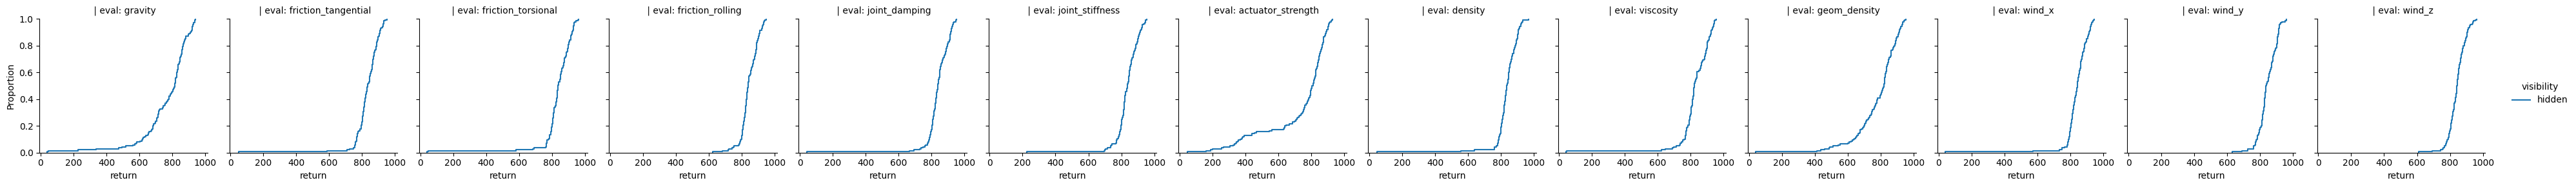

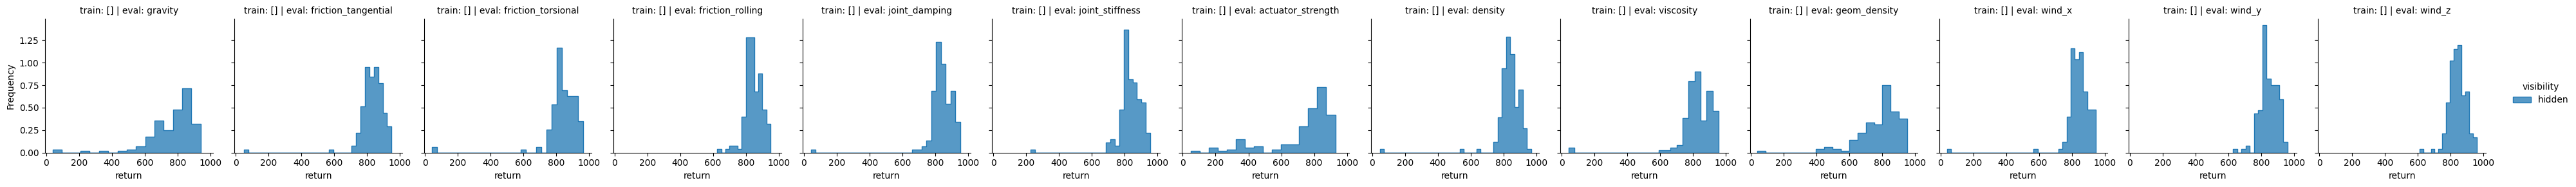

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = df.copy()
# Only those trained cfs allowed
context_feature_names = ['[]',]  #, "['m', 'l', 'g', 'dt', 'max_speed']"]
plot_df = plot_df[plot_df["context_sampler.context_feature_names"].isin(context_feature_names)]

# Only those visibilities allowed
visibilities = ['hidden', 'cgate_hadamard']
plot_df = plot_df[plot_df["visibility"].isin(visibilities)]

# We have hidden [] three times (one for each train magnitude), use only one to be fair
magnitudes = [0.1]
plot_df = plot_df[plot_df[key_magnitude_train].isin(magnitudes)]

# Filter by difficulty of test contexts
# magnitudes = [1.1]
# plot_df = plot_df[plot_df[key_magnitude].isin(magnitudes)]

# for c in plot_df.columns:
#     printr(c, plot_df[c].unique())

print(len(plot_df))

col = "context_feature"
row = "context_sampler.context_feature_names"
hue = "visibility"

# ECDF
grid = sns.FacetGrid(data=plot_df, col=col, row=row, hue=hue, legend_out=True)
grid.map_dataframe(sns.ecdfplot, x="return")
grid.set_titles(row_template="train: {row_name}", col_template="eval: {col_name}")
grid.set_titles(row_template="", col_template="eval: {col_name}")
grid.add_legend()
plt.show()

# Histogram
grid = sns.FacetGrid(data=plot_df, col=col, row=row, hue=hue, legend_out=True)
grid.map_dataframe(sns.histplot, x="return", element="step", stat="frequency")
grid.set_titles(row_template="train: {row_name}", col_template="eval: {col_name}")
grid.add_legend()
plt.show()

73500


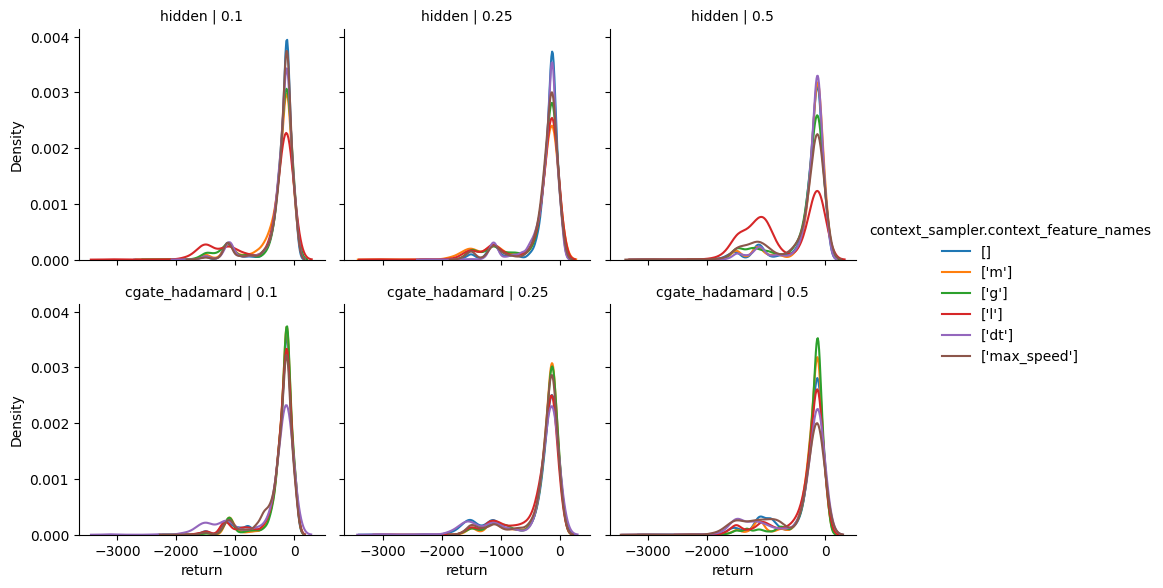

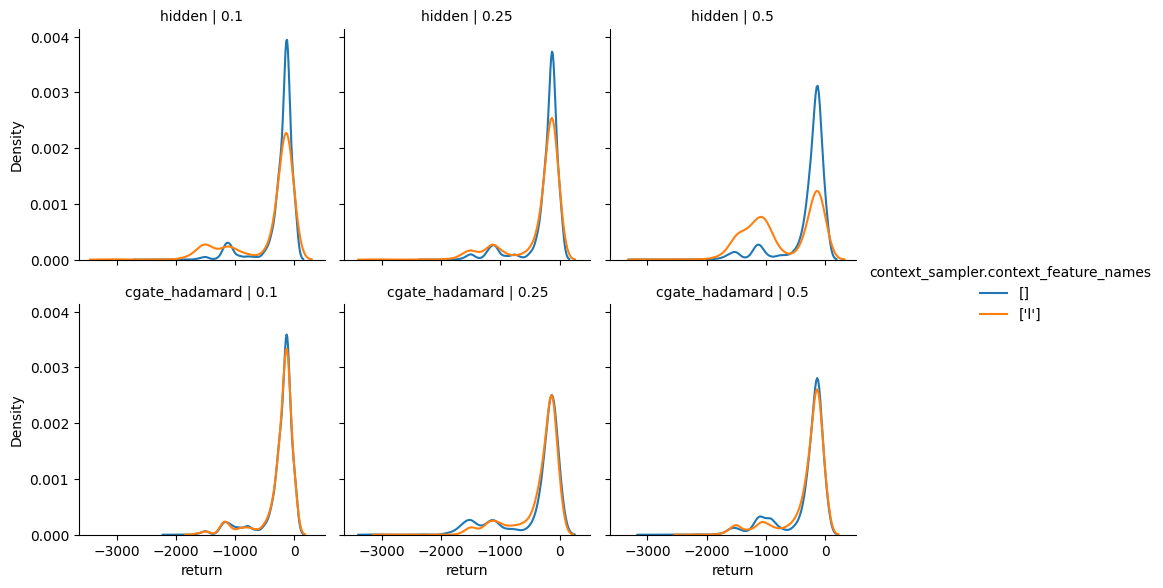

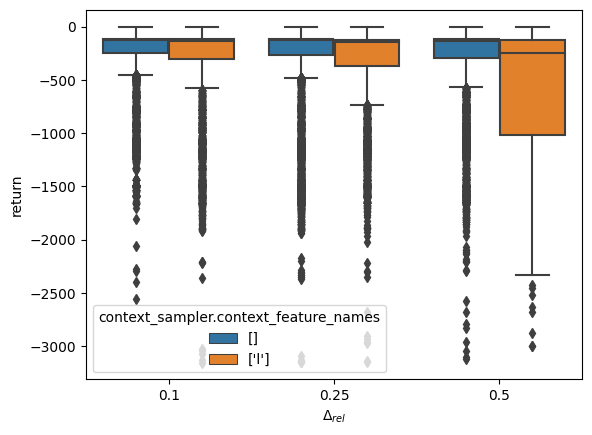

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# ax = sns.boxplot(data=df[df[key] == "['l']"], x=r"$\Delta_{rel}$", y="return", hue="visibility")
# ax.set_title("l")
# plt.show()

print(len(df[df["visibility"] == "cgate_hadamard"]))

# df = df[df["visibility"] == "hidden"]

grid = sns.FacetGrid(data=df, col=r"$\Delta_{rel}$", row="visibility", hue="context_sampler.context_feature_names", legend_out=True)
grid.map_dataframe(sns.kdeplot, x="return")
grid.set_titles(row_template="{row_name}", col_template="{col_name}")
grid.add_legend()
plt.show()


# grid = sns.FacetGrid(data=df, hue=r"$\Delta_{rel}$", row="context_sampler.context_feature_names", legend_out=True)
# grid.map_dataframe(sns.kdeplot, x="return")
# grid.add_legend()
# grid.set_titles(row_template="{row_name}")
# plt.show()

key = "context_sampler.context_feature_names"
grid = sns.FacetGrid(data=df[(df[key] == "[]") | (df[key] == "['l']")], col=r"$\Delta_{rel}$", row="visibility", hue="context_sampler.context_feature_names", legend_out=True)
grid.map_dataframe(sns.kdeplot, x="return")
grid.set_titles(row_template="{row_name}", col_template="{col_name}")
grid.add_legend()
plt.show()

sns.boxplot(data=df[(df[key] == "[]") | (df[key] == "['l']")], x=r"$\Delta_{rel}$", y="return", hue=key)
plt.show()



In [12]:
from rich import print as printr

n_contexts = 35
n_cfs = 6
n_seeds = 10
n_reps = 10
n_samples = n_contexts * n_cfs * n_seeds * n_reps
printr(n_samples)


for c in df.columns:
    printr(c, df[c].unique())

21000

context_id [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]

return [-1102.12218545  -966.55438184 -1140.46652894 ...  -668.38215462
  -789.06892587  -630.69861409]

rep [0 1 2 3 4 5 6 7 8 9]

max_speed [ 4.      6.      7.2     8.      8.8    10.     12.      0.025   0.0375
  0.045   0.05    0.055   0.0625  0.075   5.      7.5     9.     11.
 12.5    15.      0.5     0.75    0.9     1.      1.1     1.25    1.5   ]

visibility ['hidden' 'cgate_hadamard']

$\Delta_{rel}$ [0.1  0.25 0.5 ]

context_sampler.context_feature_names ['[]' "['m']" "['g']" "['l']" "['dt']" "['max_speed']"]

seed [ 1  2  3  4  5  6  7  8  9 10]

algorithm ['td3']